In [92]:
import pandas as pd
import nltk 
import string 
import re 
from nltk.corpus import stopwords                   
from nltk.stem import PorterStemmer                 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer         
from sklearn.feature_extraction.text import TfidfVectorizer          
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
import matplotlib.pyplot as plot

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\calid\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\calid\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [93]:
#Loading the data set - training data.
from sklearn.datasets import fetch_20newsgroups

#Importing training data
mydata_train = fetch_20newsgroups(subset='train', shuffle=True, remove = ('headers', 'footers', 'quotes'))

#Importing test data
mydata_test = fetch_20newsgroups(subset='test', shuffle=True, remove = ('headers', 'footers', 'quotes'))

In [94]:
#Size of the training data
print('Training data size:', len(mydata_train['data']))

#Size of the test data
print('Test data size:', len(mydata_test['data']))

Training data size: 11314
Test data size: 7532


In [95]:
#storing training data in a dataframe
mydata_train_df = pd.DataFrame({'data': mydata_train.data, 'target': mydata_train.target})
mydata_train_df.head()

#Storing test data in a dataframe
mydata_test_df = pd.DataFrame({'data': mydata_test.data, 'target': mydata_test.target})
mydata_test_df.head()

,data,target
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19


In [96]:
#Preprocessor function
def preprocessor(dataframe):
    #Stemming & Lemmatizing 
    # init stemmer
    porter_stemmer=PorterStemmer()

    # init lemmatizer
    lemmatizer = WordNetLemmatizer()

    #stop words
    stop = stopwords.words('english')

    #remove non-alphabets
    alphabet_regular_expression = re.compile("[^a-zA-Z]")

    elements = len(dataframe.data)

    for i in  range(elements):
        lemmaAndStem=''
        df_words = dataframe.data[i].split()      
        lower_words=[word.lower() for word in df_words]                                            #Lower casing
        stop_words = [w for w in lower_words if not w in stop]                                     #Removing stop words
        remove_non_alphabet = [re.sub(alphabet_regular_expression,"",y) for y in stop_words]       #Removing non -alphabets
        remove_unicode = [re.sub(r"(\xe9|\362)", "", y) for y in remove_non_alphabet]              #Removing unicode
        stemmed_words=[porter_stemmer.stem(word=word) for word in remove_unicode]                  #Stemming
        lemmatized_words=[lemmatizer.lemmatize(word=word,pos='v') for word in stemmed_words]       #Lemmatizing
        lemmaAndStem = " ".join(lemmatized_words)
        dataframe.data[i] = lemmaAndStem   
    
    return dataframe
    

In [97]:
#Preprocessing training & test data
mydata_train_df = preprocessor(mydata_train_df)
mydata_test_df  = preprocessor(mydata_test_df) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [98]:
mydata_train_df

,data,target
0,wonder anyon could enlighten car saw day door ...,7
1,fair number brave soul upgrad si clock oscil s...,4
2,well folk mac plu final give ghost weekend sta...,4
3,weitek addressphon number id like get inform chip,1
4,articl cowcbnpworldstdcom tombakerworldstdcom ...,14
...,...,...
11309,dn from nyedacnsvaxuwecedu david nye dn neurol...,13
11310,veri old mac k mac plu problem screen blank ou...,4
11311,instal dx cpu clone motherboard tri mount cpu ...,3
11312,requir hyperspher space point specifi sphere ...,1


In [99]:
#Tokenization 
vectorizer = CountVectorizer()

x_train = vectorizer.fit_transform(mydata_train_df.data)
features_train = pd.DataFrame(vectorizer.get_feature_names())

x_test  = vectorizer.transform(mydata_test_df.data)


In [100]:
#Deciding best classifier/ model for the dataset
len(features_train)

73401

In [101]:
#Multinomial Naive Bayes Classifier
def NB(train_vect, test_vect, train_df, test_df):
    clf = MultinomialNB()
    clf.fit(train_vect, train_df.target)
    pred = clf.predict(test_vect)
    accuracy = (accuracy_score(test_df.target,pred))
    return accuracy 

#Stochastic gradient descent classifier
def SGD(train_vect, test_vect, train_df, test_df):
    clf = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42, max_iter=5, tol=None)
    clf.fit(train_vect, train_df.target)
    pred = clf.predict(test_vect)
    accuracy = (accuracy_score(test_df.target,pred))
    return accuracy 

#Random Forest Classifier
def RF(train_vect, test_vect, train_df, test_df):
    clf = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
    clf.fit(train_vect, train_df.target)
    pred = clf.predict(test_vect)
    accuracy = (accuracy_score(test_df.target,pred))
    return accuracy 
        
#Logistic Regression      
def LR(train_vect, test_vect, train_df, test_df):
    simplefilter(action='ignore', category=FutureWarning)
    clf = LogisticRegression(random_state=0)
    clf.fit(train_vect, train_df.target)
    pred = clf.predict(test_vect)
    accuracy = (accuracy_score(test_df.target,pred))
    return accuracy 

In [102]:
#Accuracy of Classifiers 
classifier_perf = pd.DataFrame(columns=['classifier', 'accuracy'])
classifier_perf = classifier_perf.append({'classifier': "Naive Bayes", 'accuracy': NB(x_train,x_test,mydata_train_df, mydata_test_df)}, ignore_index=True)
classifier_perf = classifier_perf.append({'classifier': "Stochastic Gradient Descent", 'accuracy': SGD(x_train,x_test,mydata_train_df, mydata_test_df)}, ignore_index=True)
classifier_perf = classifier_perf.append({'classifier': "Random Forest", 'accuracy': RF(x_train,x_test,mydata_train_df, mydata_test_df)}, ignore_index=True)
classifier_perf = classifier_perf.append({'classifier': "Logistic Regression", 'accuracy': LR(x_train,x_test,mydata_train_df, mydata_test_df)}, ignore_index=True)

print(classifier_perf)

                    classifier  accuracy
0                  Naive Bayes  0.618030
1  Stochastic Gradient Descent  0.599841
2                Random Forest  0.487254
3          Logistic Regression  0.626925


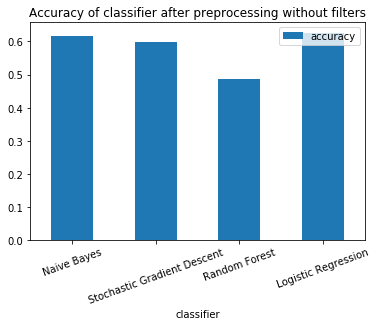

In [103]:
classifier_perf.plot.bar(x="classifier", y="accuracy", rot=20, title="Accuracy of classifier after preprocessing without filters");
plot.show(block=True);

In [104]:
#Identifying best filter for feature reduction

In [105]:
#Chi Square
def Chi(train_vect,train_df,train_features,k):
    selector = SelectKBest(chi2, k=k)
    selector.fit(x_train, train_df.target)

    indices = selector.get_support(indices=True)                        #k new features 
    scores  = pd.DataFrame(selector.scores_)                            #All chi scores
    pvalues = pd.DataFrame(selector.pvalues_)                           #ALl p values

    new_features=[]
    new_features = pd.DataFrame(train_features.iloc[indices])           #Putting new features a dataframe
    new_features = new_features.rename(columns = {0:"features"}) 

    feature_scores = scores.iloc[indices]                               #Putting scores in the dataframe
    new_features['feature_scores'] = feature_scores

    feature_pvalues = pvalues.iloc[indices]                             #Putting pvalues in the dataframe
    new_features['feature_pvalues'] = feature_pvalues
    
    return indices

#Mutual Information
def Mut(train_vect,train_df,train_features,k):
    selector = SelectKBest(mutual_info_classif, k=k)
    selector.fit(x_train, train_df.target)
    indices = selector.get_support(indices=True)                        #k new features 
    return indices

#ANOVA
def Anova(train_vect,train_df,train_features,k):
    selector = SelectKBest(f_classif, k=k)
    selector.fit(x_train, train_df.target)
    indices = selector.get_support(indices=True)                        #k new features 
    return indices

In [109]:
def get_new_features_chi(k):
    indices = Chi(x_train,mydata_train_df,features_train,k)
    accuracy = eval(indices)
    return accuracy

def get_new_features_mut(k):
    indices = Mut(x_train,mydata_train_df,features_train,k)
    accuracy = eval(indices)
    return accuracy

def get_new_features_anova(k):
    indices = Anova(x_train,mydata_train_df,features_train,k)
    accuracy = eval(indices)
    return accuracy

def eval(indices):
    #Only vector of features given by chi square 
    new_training_vector = x_train[:,indices]
    new_test_vector     = x_test[:,indices]
    accuracy = NB(new_training_vector,new_test_vector,mydata_train_df, mydata_test_df)
    return accuracy

In [110]:
#Using different filters with different no. of features to find the best one
k = [50,150,200,1000,5000,6000,9000,12000,35000,45000,55000,72828]

In [111]:
results_chi = pd.DataFrame(columns=['k', 'accuracy'])
for i in k:
    results_chi = results_chi.append({'k': i, 'accuracy': get_new_features_chi(i)}, ignore_index=True)
print(results_chi)

          k  accuracy
0      50.0  0.289565
1     150.0  0.441052
2     200.0  0.462825
3    1000.0  0.582183
4    5000.0  0.645380
5    6000.0  0.652151
6    9000.0  0.657727
7   12000.0  0.662772
8   35000.0  0.654408
9   45000.0  0.642193
10  55000.0  0.628651
11  72828.0  0.617499


In [112]:
results_mutual_info = pd.DataFrame(columns=['k', 'accuracy'])
for i in k:
    results_mutual_info = results_mutual_info.append({'k': i, 'accuracy': get_new_features_mut(i)}, ignore_index=True)
print(results_mutual_info)

          k  accuracy
0      50.0  0.344132
1     150.0  0.441184
2     200.0  0.475438
3    1000.0  0.568109
4    5000.0  0.639140
5    6000.0  0.647106
6    9000.0  0.658125
7   12000.0  0.662905
8   35000.0  0.655204
9   45000.0  0.642592
10  55000.0  0.627987
11  72828.0  0.618163


In [113]:
results_anova = pd.DataFrame(columns=['k', 'accuracy'])
for i in k:
    results_anova = results_anova.append({'k': i, 'accuracy': get_new_features_anova(i)}, ignore_index=True)
print(results_anova)

          k  accuracy
0      50.0  0.280005
1     150.0  0.414233
2     200.0  0.445566
3    1000.0  0.583643
4    5000.0  0.646309
5    6000.0  0.652815
6    9000.0  0.656665
7   12000.0  0.659719
8   35000.0  0.652947
9   45000.0  0.636219
10  55000.0  0.627722
11  72828.0  0.617100


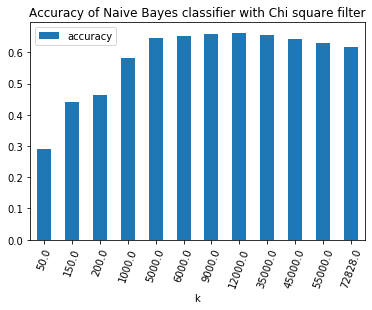

In [117]:
results_chi.plot.bar(x="k", y="accuracy", rot=70, title="Accuracy of Naive Bayes classifier with Chi square filter");
plot.show(block=True);

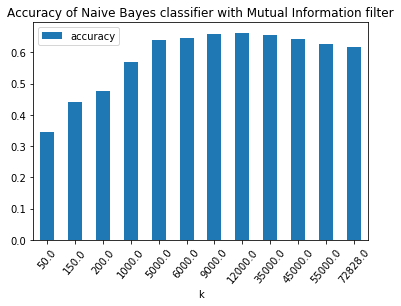

In [118]:
results_mutual_info.plot.bar(x="k", y="accuracy", rot=50, title="Accuracy of Naive Bayes classifier with Mutual Information filter");
plot.show(block=True);

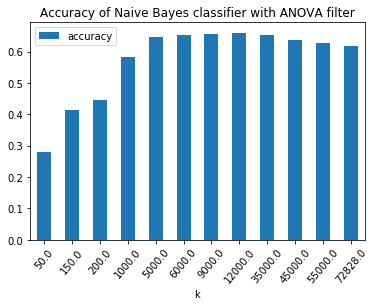

In [119]:
results_anova.plot.bar(x="k", y="accuracy", rot=50, title="Accuracy of Naive Bayes classifier with ANOVA filter");
plot.show(block=True);

In [91]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import time

print("Stochastic Gradient Descent")
tic = time.clock()
#Feature Scaling using Tdf-Idf 
text_clf = Pipeline([('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None))])
text_clf.fit(x_train, mydata_train_df.target)
toc = time.clock()
predicted = text_clf.predict(x_test)
sgd_accuracy_tfidf = accuracy_score(mydata_test_df.target, predicted)
print("With scaling",accuracy)



tic = time.clock()
text_cl = Pipeline([('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None))])
text_cl.fit(x_train, mydata_train_df.target)
toc = time.clock()
predicted = text_cl.predict(x_test)
sgd_accuracy_cv = accuracy_score(mydata_test_df.target, predicted)
print("Without scaling",accuracy)


Stochastic Gradient Descent


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


With scaling 0.4060010621348911
Without scaling 0.4060010621348911


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


In [73]:
tic = time.clock()
#Feature Scaling using Tdf-Idf 
text_clf = Pipeline([('tfidf', TfidfTransformer()),('clf', LogisticRegression(solver="saga"))])
text_clf.fit(x_train, mydata_train_df.target)
toc = time.clock()
predicted = text_clf.predict(x_test)
accuracy_1 = accuracy_score(mydata_test_df.target, predicted)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [74]:
tic = time.clock()
#Feature Scaling using Tdf-Idf 
text_clf = Pipeline([('clf', LogisticRegression(solver="saga"))])
text_clf.fit(x_train, mydata_train_df.target)
toc = time.clock()
predicted = text_clf.predict(x_test)
accuracy_2 = accuracy_score(mydata_test_df.target, predicted)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """


In [89]:
scaling = pd.DataFrame(columns=['scenario', 'accuracy'])
scaling = scaling.append({'scenario': 'With scaling' , 'accuracy': accuracy_1}, ignore_index=True)
scaling = scaling.append({'scenario': 'Without scaling', 'accuracy': accuracy_2}, ignore_index=True)
print("Logistic Regression")
print(scaling)

Logistic Regression
          scenario  accuracy
0     With scaling  0.676713
1  Without scaling  0.405337


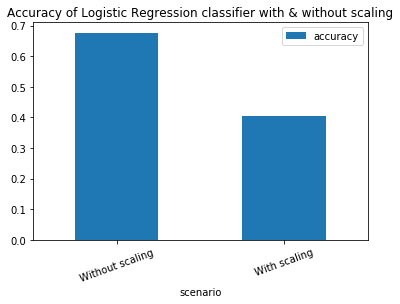

In [81]:
scaling.plot.bar(x="scenario", y="accuracy", rot=20, title="Accuracy of Logistic Regression classifier with & without scaling");
plot.show(block=True)

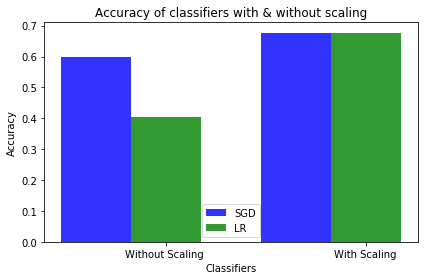

In [87]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = 2
sgd = (sgd_accuracy_cv, sgd_accuracy_tfidf)
lr = (accuracy_2,accuracy_1)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, sgd, bar_width,
alpha=opacity,
color='b',
label='SGD')

rects2 = plt.bar(index + bar_width, lr, bar_width,
alpha=opacity,
color='g',
label='LR')

plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of classifiers with & without scaling')
plt.xticks(index + bar_width, ('Without Scaling ', 'With Scaling'))
plt.legend()

plt.tight_layout()
plt.show()